**OASIS INFOBYTE DATA SCIENCE INTERNSHIP**

*TASK 2: UNEMPLOYMENT ANALYSIS*

**NAME: SHRADDHA PANDEY**

BATCH: FEBRUARY P2

In [53]:
#importing all the libraries that will be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
%matplotlib inline

unemp=pd.read_csv('unemp.csv')
print(unemp)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   

In [30]:
unemp.head() # getting the first few rows

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [31]:
unemp.info() #getting info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [33]:
unemp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [36]:
unemp.isnull().sum() #checking null values

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [39]:
#renaming the columns
unemp = unemp.rename(columns={unemp.columns[0]:'states', unemp.columns[3]:'EUR' , unemp.columns[4]:'EEMP',unemp.columns[5]:'ELPR',unemp.columns[6]:'Region'})
unemp.head()

,states,Date,Frequency,EUR,EEMP,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [44]:
unemp["states"].unique() #to list out the total unqiue states i.e without repetition

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [45]:
unemp["Region"].unique() #listing out the regions

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [46]:
unemp.groupby("Region").size() #finding out the size of every region

Region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

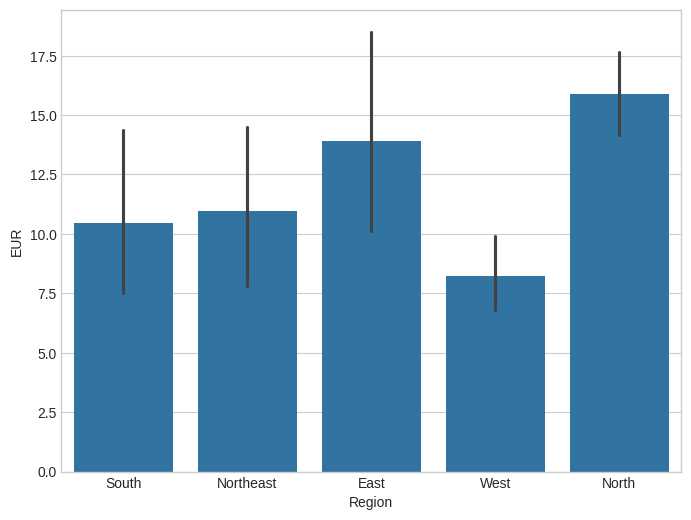

In [104]:
#overall unemployment using bar plot
plt.figure(figsize=(8,6))
sns.barplot(x = 'Region',y = 'EUR',data = unemp)
plt.show()

<ipython-input-105-7cf1cf39f7b4>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-105-7cf1cf39f7b4>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



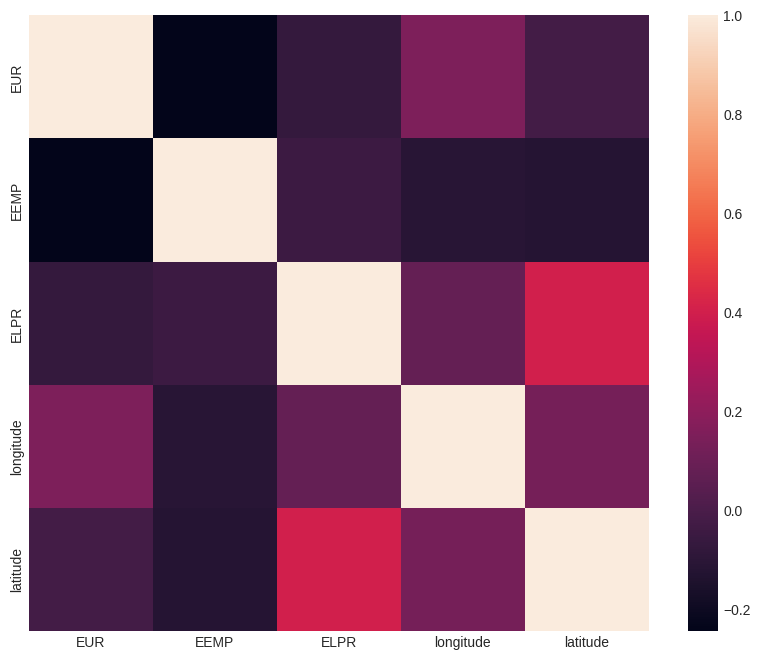

In [105]:
#finding the realtions between the features of the given dataset
plt.style.use("seaborn-whitegrid") #defining the style
plt.figure(figsize=(10,8)) #giving the size of the graph
sns.heatmap(unemp.corr())  #using a heatmap for our visualization
plt.show()

<Axes: title={'center': 'employment in India'}, xlabel='EEMP', ylabel='Count'>

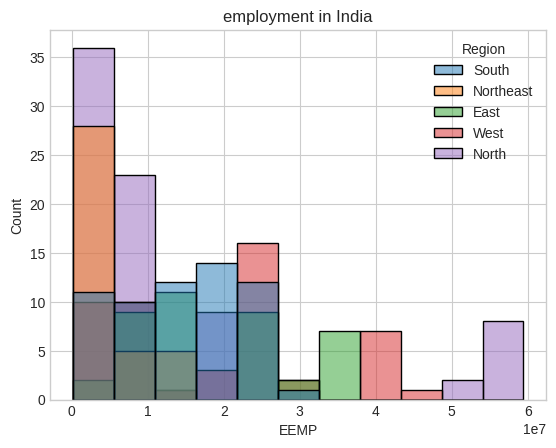

In [62]:
#checking the employment in India according to regions
unemp.columns=["states",	"Date",	"Frequency",	"EUR",	"EEMP",	"ELPR",	"Region","longitude","latitude"]
plt.title("employment in India")
sns.histplot(x="EEMP", hue="Region", data=unemp)

<function matplotlib.pyplot.show(close=None, block=None)>

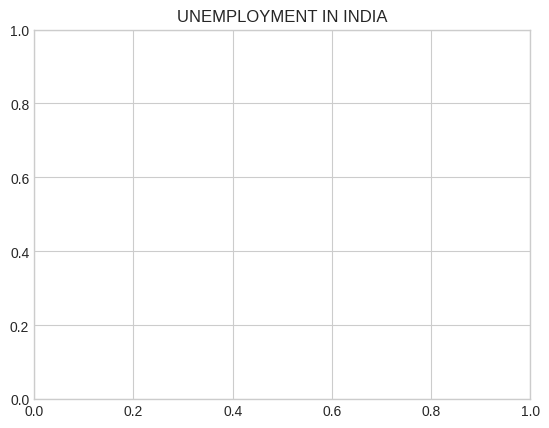

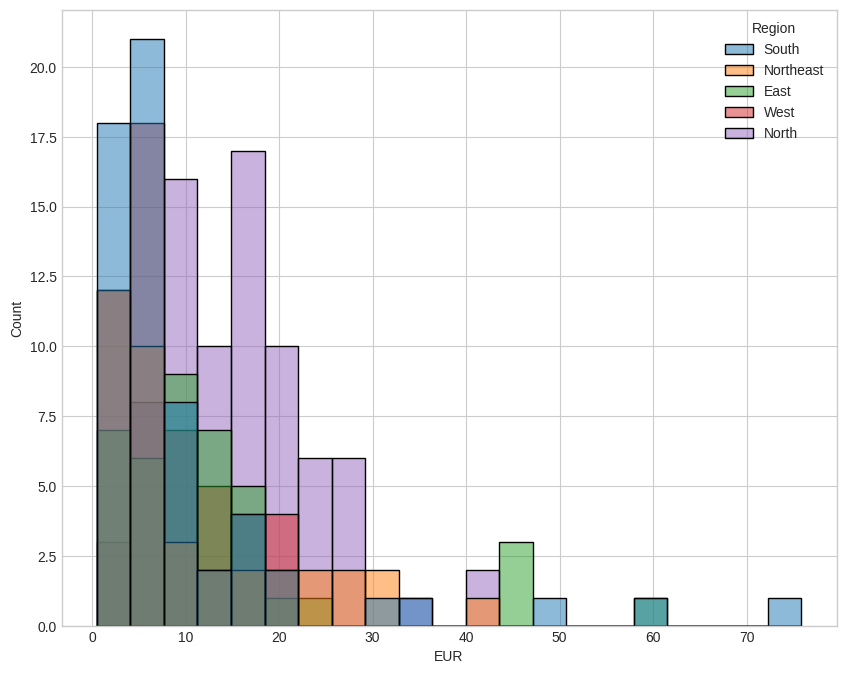

In [106]:
#STUDYING THE UNEMPLOYMENT RATES THROUGHOUT INDIA
plt.title("UNEMPLOYMENT IN INDIA")
plt.figure(figsize=(10,8))
sns.histplot(x="EUR",hue="Region", data=unemp)
plt.show

In [87]:
#visualizing the unnemployment rate through regions and states
unempl= unemp[["states","Region","EUR"]]
figure= ps.sunburst(unempl,path=["Region","states"], values="EUR", width=600,height=600, color_continuous_scale="RdY1Gn",
                     title="unemployment in india")
figure.show()